In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 15, 6

In [9]:
dataset = pd.read_csv("AirPassengers.csv")
dataset.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [12]:
dataset["Month"] = pd.to_datetime(dataset["Month"],infer_datetime_format=True)

In [15]:
indexeddataset = dataset.set_index(["Month"])

/home/aryann/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


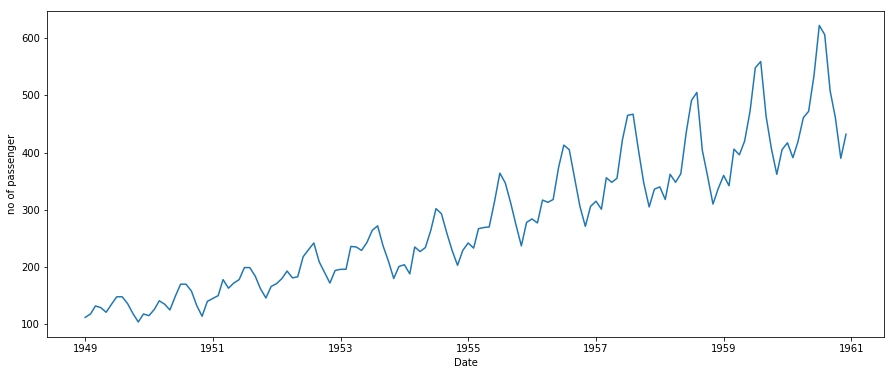

In [16]:
plt.xlabel("Date")
plt.ylabel("no of passenger")
plt.plot(indexeddataset)

In [17]:
# rolling statistics
rolmean = indexeddataset.rolling(window=12).mean()
rolstd = indexeddataset.rolling(window=12).std()

In [18]:
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

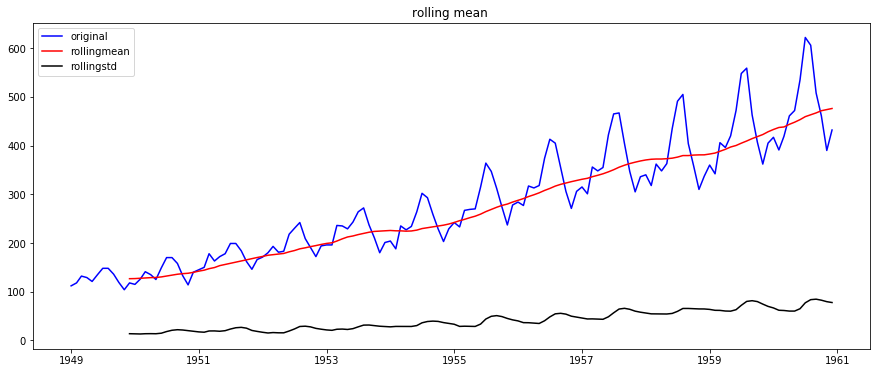

In [22]:
orig = plt.plot(indexeddataset,color="blue",label="original")
mean = plt.plot(rolmean,color="red",label="rollingmean")
std = plt.plot(rolstd,color="black",label="rollingstd")
plt.legend(loc="best")
plt.title("rolling mean ")
plt.show(block=False)


In [25]:
from statsmodels.tsa.stattools import adfuller
print("Result of dickey fuller test")
dftest = adfuller(indexeddataset["#Passengers"],autolag = "AIC")
dfoutput = pd.Series(dftest[0:4],index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])
for key,value in dftest[4].items():
    dfoutput["critical value (%s)"%key] = value
print(dfoutput)

Result of dickey fuller test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
critical value (1%)             -3.481682
critical value (5%)             -2.884042
critical value (10%)            -2.578770
dtype: float64


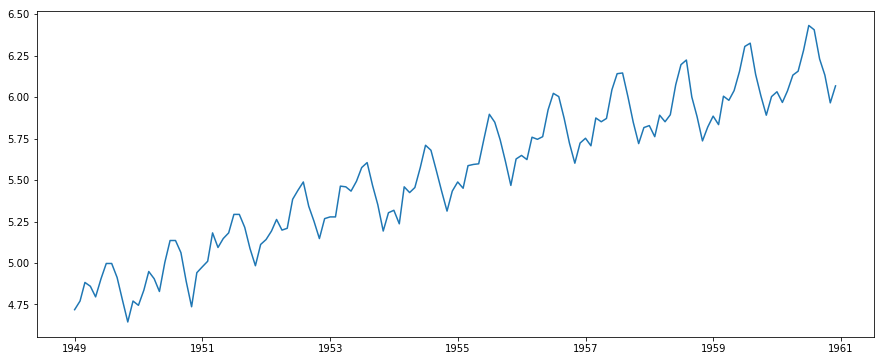

In [26]:
# estimated trend
indexed_dataset_logscale = np.log(indexeddataset)
plt.plot(indexed_dataset_logscale)

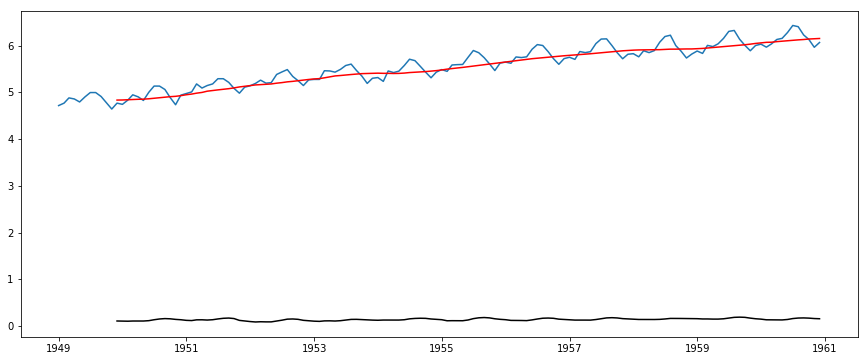

In [27]:
moving_average = indexed_dataset_logscale.rolling(window=12).mean()
moving_std = indexed_dataset_logscale.rolling(window = 12).std()
plt.plot(indexed_dataset_logscale)
plt.plot(moving_average,color="red")
plt.plot(moving_std,color="black")
